<a href="https://colab.research.google.com/github/tatayttttt/My-projects-/blob/main/H%26M_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import os
from zipfile import ZipFile
from google.colab import files
from matplotlib import pyplot as plt
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# If you don't want to download data from kaggle
files.upload() # here choose kaggle.json
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

KeyboardInterrupt: ignored

In [ ]:
#!kaggle datasets list -s h-and-m-personalized-fashion-recommendations

In [ ]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100% 28.7G/28.7G [04:10<00:00, 161MB/s]
100% 28.7G/28.7G [04:10<00:00, 123MB/s]


In [ ]:
# Bad way as there are lots of images
#!unzip h-and-m-personalized-fashion-recommendations.zip -d data

In [ ]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('h-and-m-personalized-fashion-recommendations.zip', 'r') as zipObj:
   # Get a list of all archived file names from the zip
   listOfFileNames = zipObj.namelist()
   # Iterate over the file names
   for fileName in listOfFileNames:
       # Check filename ends with csv
       if fileName.endswith('.csv'):
           # Extract a single file from zip
           zipObj.extract(fileName)

In [3]:
# Read data
articles = pd.read_csv("articles.csv")
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions_train.csv")

FileNotFoundError: ignored

In [ ]:
 articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
articles.columns

In [ ]:
# Select the most interesting columns

articles = articles[['article_id', 'product_code', 'prod_name',
       'product_type_name', 'product_group_name', 'colour_group_name',
       'department_name', 'index_name', 'index_group_name', 'section_name']]

In [ ]:
articles.product_group_name.unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [ ]:
type_group = articles.groupby(['product_group_name'], as_index = False).count()
type_group = type_group.iloc[:,:2]
type_group.columns = ['categories', 'number_of_items']
type_group

,categories,number_of_items
0,Accessories,11158
1,Bags,25
2,Cosmetic,49
3,Fun,2
4,Furniture,13
5,Garment Full body,13292
6,Garment Lower body,19812
7,Garment Upper body,42741
8,Garment and Shoe care,9
9,Interior textile,3


In [ ]:
type_group = type_group[type_group['number_of_items'] > 2000]
#type_group['scale'] = (type_group['number_of_items'] - min(type_group['number_of_items']))/min(type_group['number_of_items'])
type_group

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,categories,number_of_items,scale
0,Accessories,11158,3.569206
5,Garment Full body,13292,4.443079
6,Garment Lower body,19812,7.113022
7,Garment Upper body,42741,16.502457
12,Shoes,5283,1.163391
13,Socks & Tights,2442,0.000000
15,Swimwear,3127,0.280508
16,Underwear,5490,1.248157


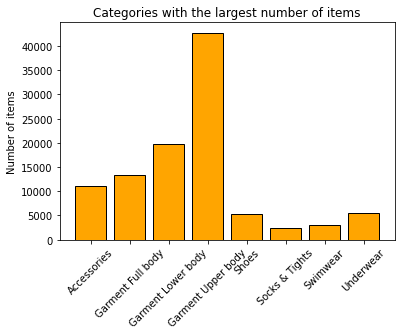

In [ ]:
plt.bar(type_group['categories'], type_group['number_of_items'], color = "orange", edgecolor = "black")
plt.xticks(rotation = 45)
plt.title("Categories with the largest number of items")
plt.ylabel("Number of items")
plt.show()

In [ ]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


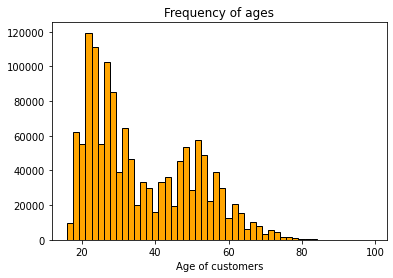

In [ ]:
plt.hist(customers.age, edgecolor = 'black', color = 'orange', bins = 50);
plt.title("Frequency of ages")
plt.xlabel("Age of customers");

In [ ]:
member = customers.groupby(['club_member_status'], as_index = False).count()
y = customers.club_member_status.unique()

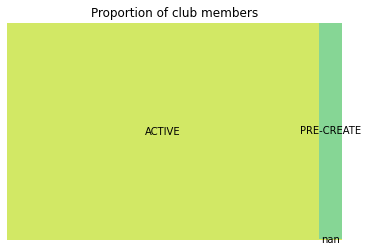

In [ ]:
squarify.plot(sizes = member.customer_id,
              label = y, alpha = 0.7)
plt.axis('off')
plt.title("Proportion of club members")
plt.show()

In [ ]:
news = customers.groupby(['fashion_news_frequency'], as_index = False).count()
news = news[news['customer_id'] > 100]  # To avoid None that have 2 persons
y = news.fashion_news_frequency.unique()

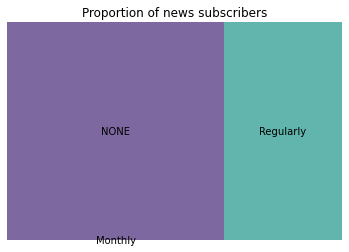

In [ ]:
squarify.plot(sizes = news.customer_id,
              label = y, alpha = 0.7)
plt.axis('off')
plt.title("Proportion of news subscribers")
plt.show()

In [ ]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [ ]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [ ]:
mean_price = transactions.groupby(['t_dat', 'customer_id'], as_index = False)['price'].mean()
mean_price

,t_dat,customer_id,price
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.040661
1,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.017271
2,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,0.038119
3,2018-09-20,0008968c0d451dbc5a9968da03196fe20051965edde741...,0.021424
4,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0.023768
...,...,...,...
9080174,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,0.031810
9080175,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0.050831
9080176,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0.043203
9080177,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0.006763


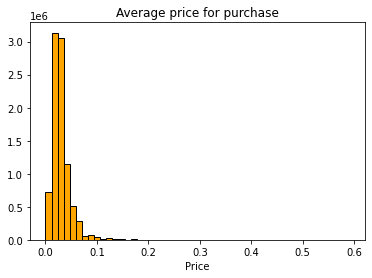

In [ ]:
plt.hist(mean_price.price, edgecolor = 'black', color = 'orange', bins = 50);
plt.title("Average price for purchase")
plt.xlabel("Price");  # Unfortunetly, there is no information about units

In [ ]:
mean_transactions = transactions.groupby(['t_dat', 'customer_id'], as_index = False)['article_id'].count()
mean_transactions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
mean_transactions.article_id.mean()

3.500847725578978

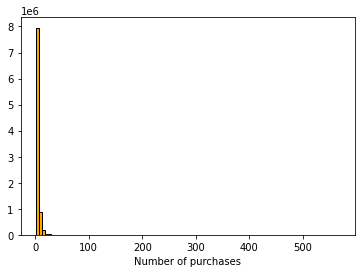

In [ ]:
plt.hist(mean_transactions.article_id, edgecolor = 'black', color = 'orange', bins = 100);
plt.xlabel("Number of purchases");
# Think how to cut the range of a histogram

In [ ]:
popular_items = transactions.groupby(['article_id'], as_index = False)['t_dat'].count()
top_items = popular_items.sort_values(['t_dat'], ascending = False)[:20]  # Top 20 items 
top_items = top_items.rename(columns = {"t_dat":"count"})

In [ ]:
result = pd.merge(top_items, articles, on = "article_id")
result  # We can just recommend customers to buy the most popular items

,article_id,count,product_code,prod_name,product_type_name,product_group_name,colour_group_name,department_name,index_name,index_group_name,section_name
0,706016001,50287,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Trousers,Divided,Divided,Divided Collection
1,706016002,35043,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Trousers,Divided,Divided,Divided Collection
2,372860001,31718,372860,7p Basic Shaftless,Socks,Socks & Tights,Black,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh"
3,610776002,30199,610776,Tilly (1),T-shirt,Garment Upper body,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics
4,759871002,26329,759871,Tilda tank,Vest top,Garment Upper body,Black,EQ Divided Basics,Divided,Divided,Divided Complements Other
5,464297007,25025,464297,Greta Thong Mynta Low 3p,Underwear bottom,Underwear,Black,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie
6,372860002,24458,372860,7p Basic Shaftless,Socks,Socks & Tights,White,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh"
7,610776001,22451,610776,Tilly (1),T-shirt,Garment Upper body,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics
8,399223001,22236,399223,Curvy Jeggings HW Ankle,Trousers,Garment Lower body,Black,Denim Trousers,Divided,Divided,Ladies Denim
9,706016003,21241,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Dark Blue,Trousers,Divided,Divided,Divided Collection


First of all we can try to model KNN. So, we predict the item according to customer features (age, activity, previous purchases), find 'neighbours' and understand what we can recommend them based on the choice of the closest customers

In [ ]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [ ]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [ ]:
customs = customers[['customer_id', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']]

In [ ]:
customs

,customer_id,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [ ]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [ ]:
X = pd.concat([customs, transactions], axis = 1)
X

In [ ]:
trans

In [ ]:
y = transactions['article_id']


# Таня 


In [6]:
article_col = articles[['article_id', 'product_code','product_type_no', 'graphical_appearance_no', 'colour_group_code', 
                     'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_group_no',
                     'section_no', 'garment_group_no']] 

In [9]:
customers_col = customers[['customer_id', 'club_member_status', 'fashion_news_frequency', 'age']]

In [8]:
data1 = pd.merge(transactions,article_col, on = ['article_id'])
data2 = pd.merge(data1,customers_col, on = ['article_id'])

NameError: ignored

# Kmeans

In [11]:
from sklearn.cluster import KMeans

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
